In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Activation, Dense# Type of layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from functions import *
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [21]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("NUM GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

NUM GPUs Available:  1


In [22]:
df = pd.read_csv("assignment-files/wine.csv", index_col="index")
columns = df.columns
print(df.head())
df = df.drop_duplicates()
df = df[df["quality"] != 9]
print(df["quality"].value_counts())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
index                                                                 
0                7.4              0.70         0.00             1.9   
1                7.8              0.88         0.00             2.6   
2                7.8              0.76         0.04             2.3   
3               11.2              0.28         0.56             1.9   
4                7.4              0.70         0.00             1.9   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
index                                                                        
0          0.076                 11.0                  34.0   0.9978  3.51   
1          0.098                 25.0                  67.0   0.9968  3.20   
2          0.092                 15.0                  54.0   0.9970  3.26   
3          0.075                 17.0                  60.0   0.9980  3.16   
4          0.076                 1

In [23]:
y = df["quality"].values
X = df.drop(["quality","target"], axis=1).values
X_train, X_test, y_train, y_test_unnorm = train_test_split(X,y,test_size=0.2, stratify=df["target"].values,
                                                           shuffle=True, random_state=6)

In [24]:
smote = SMOTE(random_state=6, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [25]:
scaler = MinMaxScaler().fit(X_train)
X_train_smote = scaler.transform(X_train_smote)
X_test = scaler.transform(X_test)
scaler_y = MinMaxScaler().fit(y_train.reshape(-1,1))
y_train_smote = scaler_y.transform(y_train_smote.reshape(-1,1))
y_test = scaler_y.transform(y_test_unnorm.reshape(-1,1))

In [26]:
linear_model = Sequential([
    Dense(units=8,activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=32,activation="relu"),
    Dense(units=1)])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0002),
    loss='mean_absolute_error')

history = linear_model.fit(X_train_smote, y_train_smote, epochs=400,
                           verbose=2,validation_split =0.2,batch_size=10)

Epoch 1/400
884/884 - 3s - loss: 0.2347 - val_loss: 0.3874
Epoch 2/400
884/884 - 2s - loss: 0.1943 - val_loss: 0.3275
Epoch 3/400
884/884 - 2s - loss: 0.1851 - val_loss: 0.3190
Epoch 4/400
884/884 - 2s - loss: 0.1802 - val_loss: 0.3127
Epoch 5/400
884/884 - 2s - loss: 0.1767 - val_loss: 0.3399
Epoch 6/400
884/884 - 2s - loss: 0.1742 - val_loss: 0.3139
Epoch 7/400
884/884 - 2s - loss: 0.1720 - val_loss: 0.3470
Epoch 8/400
884/884 - 2s - loss: 0.1704 - val_loss: 0.3158
Epoch 9/400
884/884 - 2s - loss: 0.1684 - val_loss: 0.2953
Epoch 10/400
884/884 - 2s - loss: 0.1666 - val_loss: 0.3079
Epoch 11/400
884/884 - 2s - loss: 0.1645 - val_loss: 0.2830
Epoch 12/400
884/884 - 2s - loss: 0.1625 - val_loss: 0.2989
Epoch 13/400
884/884 - 2s - loss: 0.1609 - val_loss: 0.2970
Epoch 14/400
884/884 - 2s - loss: 0.1594 - val_loss: 0.2733
Epoch 15/400
884/884 - 2s - loss: 0.1583 - val_loss: 0.2717
Epoch 16/400
884/884 - 2s - loss: 0.1571 - val_loss: 0.3329
Epoch 17/400
884/884 - 2s - loss: 0.1558 - val_lo

In [27]:
linear_model.save("models/linear_8.h5")

34/34 - 0s - loss: 0.1382
Status at last epoch:
train_score = 0.10543834418058395
val_score   = 0.23462994396686554


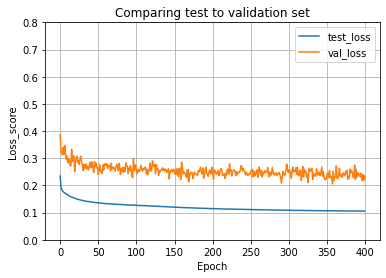

test loss_score: 0.13823935389518738


In [28]:
test_results = linear_model.evaluate(X_test, y_test, verbose=2)
plot_and_print_loss(history)
print(f"test loss_score: {test_results}")

In [29]:
y_pred = linear_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

<Figure size 1008x1008 with 0 Axes>

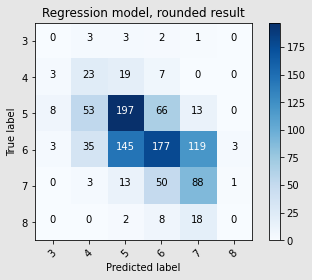

In [30]:
y_pred_classes = [round(x[0]) for x in y_pred]
labels = [3,4,5,6,7,8]
cm = confusion_matrix(y_test_unnorm, y_pred_classes)
plot_confusion_matrix(cm=cm, classes=labels,
                      title= "Regression model, rounded result",
                      savefig_location="visuals/regression_best")

In [31]:
print(classification_report(y_test_unnorm, y_pred_classes))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.20      0.44      0.27        52
           5       0.52      0.58      0.55       337
           6       0.57      0.37      0.45       482
           7       0.37      0.57      0.45       155
           8       0.00      0.00      0.00        28

    accuracy                           0.46      1063
   macro avg       0.28      0.33      0.29      1063
weighted avg       0.49      0.46      0.46      1063

